**оценка классификатора**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---

In [2]:
data = pd.read_csv('../data/uci/wine.csv.gz',header=None)
print(len(data))


data.columns = [
    'class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',
    ]

data.sample(2)

178


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
119,2,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564


In [3]:
data.groupby('class').count()[['Alcohol']]

,Alcohol
class,
1,59
2,71
3,48


In [4]:
data['y'] = data['class'].map({1:1,2:0,3:1}) 

In [5]:
data.groupby('y').count()[['Alcohol']]

,Alcohol
y,
0,71
1,107


---

In [6]:
X = data[[    
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',
    ]].values

y = data['y'].values

X.shape,y.shape

((178, 13), (178,))

---

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35, 13), (35,), (143, 13), (143,))

In [8]:
%xdel X
%xdel y
%xdel data

---

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(metric='euclidean')

clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
r = clf.predict(X_test)


---

In [11]:
from sklearn.metrics import  accuracy_score

accuracy_score(y_test,r)

0.9230769230769231

In [12]:
from sklearn.metrics import classification_report

print( classification_report(y_test,r) )

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        56
           1       0.96      0.91      0.93        87

   micro avg       0.92      0.92      0.92       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,r)
print(cm)

[[53  3]
 [ 8 79]]


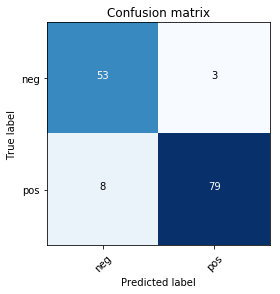

In [14]:
import itertools

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title('Confusion matrix')
# plt.colorbar()

classes=['neg','pos']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

---

In [15]:
p = clf.predict_proba(X_test)

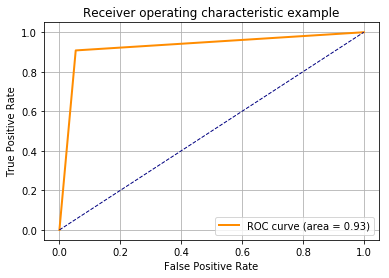

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve( y_test, p[:,1] )
roc_auc = auc(fpr,tpr)

plt.figure()
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

---